<a href="https://colab.research.google.com/github/ratchana-selvaraj/rach-projects/blob/master/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gold Price Prediction


#  Data Preprocessing

In [ ]:
import pandas as pd  #for preprocessing and prediction
import numpy as np
import sys
from scipy.stats import pearsonr 
from sklearn.preprocessing import MinMaxScaler #normalisation
from sklearn.model_selection import train_test_split #for splitting train and test dataset
from sklearn.linear_model import LinearRegression
import seaborn as sns #for data visualization 
import matplotlib.pyplot as plt
from apyori import apriori
#!pip install apyori

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gold_price.csv to gold_price.csv


In [ ]:
import io
df = pd.read_csv('gold_price.csv')
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
df.notnull() #this shows there no missing values in dataset

,Date,SPX,GLD,USO,SLV,EUR/USD
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
2285,True,True,True,True,True,True
2286,True,True,True,True,True,True
2287,True,True,True,True,True,True
2288,True,True,True,True,True,True


In [ ]:
df.describe()


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
#correlation for all attributes
dff=df.corr() #function
dff.style.background_gradient(cmap='coolwarm').set_precision(2)

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.00,0.05,-0.59,-0.27,-0.67
GLD,0.05,1.00,-0.19,0.87,-0.02
USO,-0.59,-0.19,1.00,0.17,0.83
SLV,-0.27,0.87,0.17,1.00,0.32
EUR/USD,-0.67,-0.02,0.83,0.32,1.00


In [ ]:
#calculating pearson correlation for gold and silver
gold=df['GLD']
silver=df['SLV']
cor,_=pearsonr(gold,silver) #function 
cor
#as it is greater than 0 it is highly correlated

0.8666318812634396

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


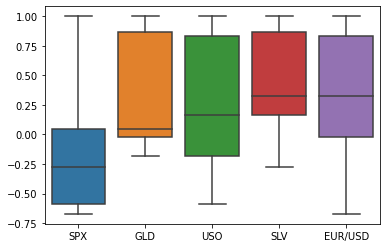

In [ ]:
#boxplot , to understand how well the data is distributed in dataset
bx=sns.boxplot(data=dff)
dff

[[0.35087007 0.12967974 0.64380934 0.16480084 0.77292403]
 [0.35087007 0.13587574 0.64289628 0.1675345  0.77792447]
 [0.33469315 0.13203593 0.63321764 0.16446239 0.77971277]
 ...
 [0.9317956  0.48154291 0.05889335 0.17938038 0.27281059]
 [0.93500996 0.47552142 0.05861943 0.1746941  0.27524917]
 [0.93302946 0.45853741 0.058855   0.17193961 0.25544572]]


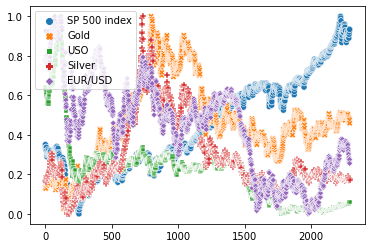

In [ ]:
#Normalization
#define the min max
scaler = MinMaxScaler()
df= df[['SPX','GLD','USO','SLV','EUR/USD']]
scaler=scaler.fit_transform(df)#transform the data
print(scaler)
sc=pd.DataFrame(scaler)
sc.rename(columns={0:'SP 500 index',1:'Gold',2:'USO',3:'Silver',4:'EUR/USD'},inplace=True)
ax=sns.scatterplot(data=sc)

# Association

In [ ]:
records = [] 
for i in range(len(df)):
  records.append([str(df.values[i,j]) for j in range(5)])
print(records)
association_rules = apriori(records, min_support=0.00045, min_confidence=0.1, min_lift=3, min_length=2)
association_results = list(association_rules)


[['1447.160034', '84.860001', '78.470001', '15.18', '1.471692'], ['1447.160034', '85.57', '78.370003', '15.285', '1.474491'], ['1411.630005', '85.129997', '77.309998', '15.167', '1.475492'], ['1416.180054', '84.769997', '75.5', '15.052999999999999', '1.468299'], ['1390.189941', '86.779999', '76.059998', '15.59', '1.557099'], ['1409.130005', '86.550003', '75.25', '15.52', '1.466405'], ['1420.329956', '88.25', '74.019997', '16.061001', '1.4801'], ['1401.02002', '88.58000200000001', '73.089996', '16.077', '1.479006'], ['1416.25', '89.540001', '74.25', '16.280001000000002', '1.4869'], ['1380.949951', '87.989998', '72.779999', '15.834000000000001', '1.48021'], ['1373.199951', '86.699997', '71.849998', '15.654000000000002', '1.466405'], ['1333.25', '86.5', '71.029999', '15.717', '1.464'], ['1325.189941', '87.41999799999999', '71.540001', '16.030001000000002', '1.4617959999999999'], ['1310.5', '88.16999799999999', '70.550003', '15.902000000000001', '1.4647940000000002'], ['1338.599976', '87.8

In [ ]:
print(len(list(association_results)))

9


In [ ]:
print(association_results[0])
print(association_results[1])
print(association_results[2])
print(association_results[3])

RelationRecord(items=frozenset({'1.0643850000000001', '13.52'}), support=0.0008733624454148472, ordered_statistics=[OrderedStatistic(items_base=frozenset({'1.0643850000000001'}), items_add=frozenset({'13.52'}), confidence=1.0, lift=381.6666666666667), OrderedStatistic(items_base=frozenset({'13.52'}), items_add=frozenset({'1.0643850000000001'}), confidence=0.33333333333333337, lift=381.6666666666667)])
RelationRecord(items=frozenset({'1.381006', '18.709999'}), support=0.0008733624454148472, ordered_statistics=[OrderedStatistic(items_base=frozenset({'1.381006'}), items_add=frozenset({'18.709999'}), confidence=1.0, lift=572.5), OrderedStatistic(items_base=frozenset({'18.709999'}), items_add=frozenset({'1.381006'}), confidence=0.5, lift=572.5)])
RelationRecord(items=frozenset({'15.63', '115.43'}), support=0.0008733624454148472, ordered_statistics=[OrderedStatistic(items_base=frozenset({'115.43'}), items_add=frozenset({'15.63'}), confidence=1.0, lift=381.6666666666667), OrderedStatistic(ite

# Linear Prediction

In [ ]:
#since silver and gold are highly correlated predictions is performed with that two
x = df.iloc[:, 4].values
y = df.iloc[:, 2].values
# Here is the trick
x = x.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3) 
#fitting simple linear regression to training dataset
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

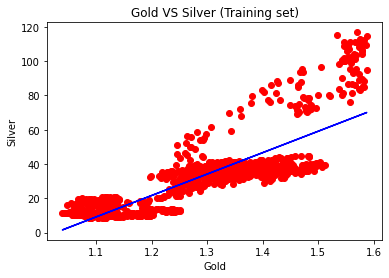

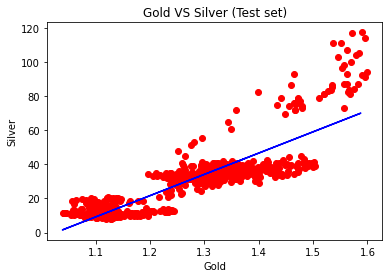

In [ ]:
# Visualizing the Training set results
viz_train = plt
viz_train.scatter(x_train, y_train, color='red')
viz_train.plot(x_train, reg.predict(x_train), color='blue')
viz_train.title('Gold VS Silver (Training set)')
viz_train.xlabel('Gold')
viz_train.ylabel('Silver')
viz_train.show()

# Visualizing the Test set results
viz_test = plt
viz_test.scatter(x_test, y_test, color='red')
viz_test.plot(x_train, reg.predict(x_train), color='blue')
viz_test.title('Gold VS Silver (Test set)')
viz_test.xlabel('Gold')
viz_test.ylabel('Silver')
viz_test.show()

In [ ]:
y_pred=reg.predict(x_test)

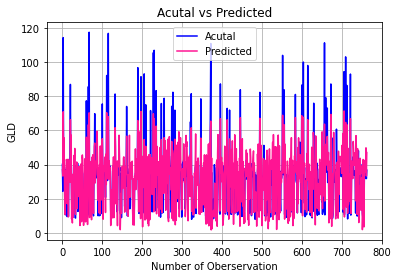

In [ ]:
plt.plot(y_test, color = 'blue', label = 'Acutal')
plt.plot(y_pred, color = 'deeppink', label = 'Predicted')
plt.grid(0.3)
plt.title('Acutal vs Predicted')
plt.xlabel('Number of Oberservation')
plt.ylabel('GLD')
plt.legend()
plt.show()

# Clustering
# K means

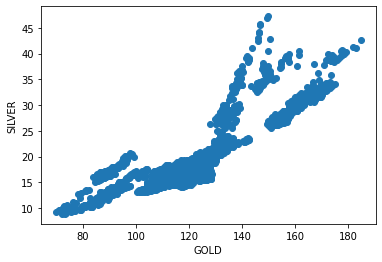

In [ ]:
#for this experiment we will take gold and silver
dd=df[['GLD','SLV']]
plt.scatter(dd['GLD'],dd['SLV'])
plt.xlabel("GOLD")
plt.ylabel("SILVER")
plt.show()

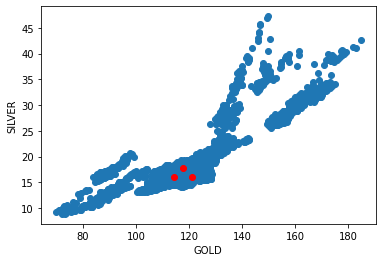

In [ ]:
#forming 3 clusters 
k=3
centroids=(dd.sample(n=k))
plt.scatter(dd['GLD'],dd['SLV'])
plt.scatter(centroids['GLD'],centroids['SLV'],c='red')
plt.xlabel("GOLD")
plt.ylabel("SILVER")
plt.show()

In [ ]:
diff=1
j=1
while(diff!=0):
  xd=dd
  i=1
  for index_1,row_c in centroids.iterrows():
    ed=[]
    for index2,row_d in xd.iterrows():
      d1=(row_c['GLD']-row_d['GLD'])**2
      d2=(row_d['SLV']-row_d['SLV'])**2
      d=np.sqrt(d1+d2)
      ed.append(d)
    dd[i]=ed
    i=i+1
  c=[]
  for index,row in dd.iterrows():
    min_dist=row[1]
    pos=1
    for i in range(k):
      if row[i+1] < min_dist:
        min_dist=row[i+1]
        pos=i+1
    c.append(pos)
  dd['CLUSTER']=c
  new_centroid=dd.groupby('CLUSTER').mean()[['GLD','SLV']]
  if j==0:
    diff =1
    j=j+1
  else:
    diff=(new_centroid['GLD']-centroids['GLD']).sum()+(new_centroid['SLV']-centroids['SLV']).sum()
    print(diff)
  centroids=dd.groupby('CLUSTER').mean()[['GLD','SLV']]


13.68994704867705
6.860183873313398
2.3348203760216695
0.7702563105115043
0.27793334353866683
0.09012675985976593
0.04785301818893117
0.0


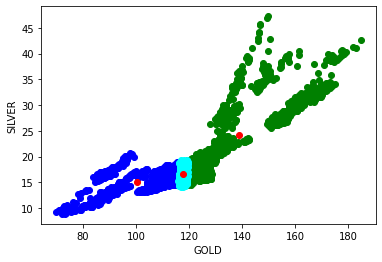

In [ ]:
color=['blue','green','cyan']
for CL in range(k):
    data=dd[dd["CLUSTER"]==CL+1]
    plt.scatter(data["GLD"],data["SLV"],c=color[CL])
plt.scatter(centroids["GLD"],centroids["SLV"],c='red')
plt.xlabel('GOLD')
plt.ylabel('SILVER')
plt.show()